# Задача:

Сгенерировать таблицу с данными о сотрудниках компании: ID, имя, возраст, пол, стаж, грейд и т.д. Используем для этого разные модули и библиотеки: `random`, `np.random`, `string`, `faker`. Сгенерируем и зафиксируем случайно выбранные значения, нормальное и экспоненциальное распределение, выстроим простую логику присвоения значений в зависимости от условий.

# Подготовка

Импортируем основные библиотеки

In [2]:
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

Устанавливаем глобальные параметры визуализации:

In [3]:
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['figure.figsize'] = (8,6)

sns.layout = 'tight'
sns.set_style('whitegrid')
sns.set_palette('crest')

## Генерируем ID 

Часто достаточно просто взять последовательность чисел, каждое из которых будет присвоено пользователю в качестве ID. В случайном порядке или последовательно - по желанию.

In [4]:
# последовательно
user_id = np.arange(1,101).tolist()

# выведем первые 3 элемента списка
user_id[:3]

[1, 2, 3]

In [5]:
# в случайном порядке
user_id_rand = np.random.choice(user_id, 100).tolist()

# выведем первые 3 элемента списка
user_id_rand[:3]

[70, 55, 80]

Если мы хотим сделать ID более похожими на реальные, можно сгенерировать случайную последовательность буквенных или числовых символов нужной длины.

Здесь нам поможет библиотека `string`. 


In [6]:
import string

Создадим лист из последовательностей цифр длиной `k`

In [7]:
user_id_nums = []
k = 6

for i in range(100):
    string.digits
    user_id_nums.append(''.join(random.sample(string.digits, k)))

# выведем первые три элемента списка
user_id_nums[:3]


['394107', '406329', '543906']

Можно сгенерировать айдишник из латинских букв:

In [8]:
user_id_letters = []
k = 8
for i in range(101):
    string.ascii_letters
    user_id_letters.append(''.join(random.sample(string.ascii_letters, k)))

# выведем первые три элемента списка
user_id_letters[:3]

 

['fnUVwgoI', 'YDOSkPLl', 'IHLZceoq']

Можно создать ID, состоящий из `l` букв в верхнем регистре (используем `string.ascii_uppercase`), отделенных дефисом от последовательности из `k` цифр:

In [9]:
user_id_num_n_let = []
k = 8
l = 3
for i in range(100):
    string.digits
    string.ascii_letters
    a = ''.join(random.sample(string.ascii_uppercase, l))
    b = ''.join(random.sample(string.digits, k))
    uid = a + '-' + b
    user_id_num_n_let.append(uid)

# выведем первые три элемента списка
user_id_num_n_let[:3]

['YNQ-89137265', 'ZTS-91257083', 'MSR-78951240']

У вышеприведенного способа есть подводный камень: не получится сгенерировать последовательность цифр длиннее десяти. Чтобы обойти это ограничение, используем не `random.sample()`, а `random.choices()` - этот метод генерирует выборки с возвращением, что позволяет создавать последовательности любой длины.

Еще один важный момент. Каждый перезапуск кода будет генерировать новую случайную последовательность символов. И если в ваших расчетах или срезах данных будут задействованы конкретные ID, то полезут ошибки. 

Чтобы зафиксировать псевдослучайные величины, которые для нас генерирует модуль` random`, есть параметр `random.seed()` - при каждом перезапуске будет генерироваться одна и та же выборка. Чтобы интегрировать `random.seed()` в цикл, я использовал `enumerate()`, который будет присваивать каждой итерации свой `seed`, тем самым фиксируя значение.

Заавернем весь написанный выше код в функцию, которая позволит создавать лист из ID нужного нам формата:

In [10]:
def get_id_list(n, method_1, k, method_2=None, l=None):

    '''
    Функция принимает на вход длину списка, методы генерации и длину последовательностей (k и l)
    n - длина списка;
    k - число символов в первом методе генерации;
    l - число символов во втором методе генерации.
    Методы генерации:
    — string.digits - последовательность случайных чисел;
    — string.ascii_letters - последовательность случайных букв;
    — string.ascii_uppercase - последовательность заглавных букв;
    — string.ascii_lowercase - последовательность строчных букв
    Функция возвращает список user_id из нужных элементов
        '''

    user_id = []
    if method_2 == None:
        for i, j in enumerate(range(n)):
            random.seed(j)
            user_id.append(''.join(random.choices(method_1, k=k)))
    else: 
        for i, j in enumerate(range(n)):
            string.digits
            string.ascii_letters
            random.seed(j)
            a = ''.join(random.choices(method_1, k=k))
            b = ''.join(random.choices(method_2, k=l))
            uid = a + '-' + b
            user_id.append(uid)

    return user_id

Соберем список ID для нашей задачи:

In [11]:
employee_id = get_id_list(300, string.ascii_uppercase, 3, string.digits, 10)
employee_id[:3]

['VTK-2547345952', 'DWT-2446700847', 'YYB-0876366514']

## Начало работы в компании

Для генерации столбца с датами нам понадобится задать начало и конец временного диапазона. Для нашей задачи сначала задаем `end_date`: дату, на которой мы «заморозили» найм.

In [12]:
end_date = pd.to_datetime('2022-02-23')
end_date

Timestamp('2022-02-23 00:00:00')

Дату начала диапазона мождо задать как обычной календарной датой (аналогично `end_date`), так и при помощи интервала, если вы, к примеру, хотите сгенерировать датасет, в котором будет зафиксировано 14 или 30 дней наблюдений. 

Для этого нам понадобится импортировать класс `timedelta` модуля `datetime`.

In [13]:
from datetime import timedelta

start_date = end_date - timedelta(days=1000)
start_date

Timestamp('2019-05-30 00:00:00')

Теперь мы используем `pd.date_range()`, чтобы создать будущий столбец с датами. Указываем начало и конец диапазона и частоту - «шаг» появления новых записей - в секундах, минутах, часах или днях, в зависимости от ваших задач.

In [14]:
dates = pd.date_range(start_date, end_date, freq='1D')
np.random.seed(17)
dt = np.random.choice(dates, 300)
dt = pd.to_datetime(dt).date

Еще один вариант - вместо даты окончания можно задать количество периодов, которые мы указываем в параметре `freq`:

In [15]:
dates_2 = pd.date_range(start='2021-01-01', periods=10, freq='1D')

# сгенерировали период в 10 дней
dates_2.min(), dates_2.max()

(Timestamp('2021-01-01 00:00:00', freq='D'),
 Timestamp('2021-01-10 00:00:00', freq='D'))

# Отдел 

Теперь сгенерируем отделы. Для этого используем `random.choices` и зафиксируем `seed`. Таким же образом можно созавать любые категориальные признаки: страны, категории покупок, цвет и т.д.
Чтобы было интереснее, добавим параметр `weights`, который отвечает за пропорции категорий в получаемом столбце.

In [16]:
department = ['sales', 'it', 'growth', 'management', 'engineering', 'ui_ux', 'pr', 'tech']

random.seed(17)
deps = random.choices(department, weights=[0.15, 0.12, 0.12, 0.1, 0.1, 0.14, 0.09, 0.18], k =300)
deps[:3]

['engineering', 'pr', 'tech']

# Зарплаты

Для моделирования зарплат возьмем экспоненциальное распределение: большая часть рядовых сотрудников получает зарплату примерно на одном уровне, с ростом грейда зарплата растет, топы зарабатывают заметно больше остальных.

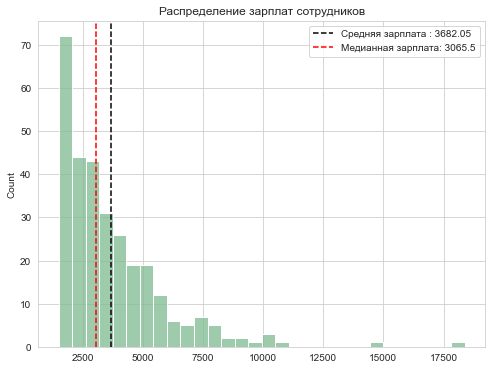

In [17]:
np.random.seed(17)
salary  = np.round(np.random.exponential(scale=2000, size=300)).astype('int')

# устанавливаем уровень минимальной заработной платы
min_salary = 1500
salary = salary + min_salary

ax = sns.histplot(salary, bins=30)
ax.axvline(np.mean(salary),
             color = 'k',
             linestyle ='--',
             label=f'Средняя зарплата : {np.mean(salary)}')
ax.axvline(np.median(salary),
             color = 'r',
             linestyle ='--',
             label=f'Медианная зарплата: {np.median(salary)}')
plt.title('Распределение зарплат сотрудников')
plt.legend()
plt.show()

# Возраст

Для возраста задаем нормальное распределение. Средний возраст (параметр `loc`) указываем равным 40б стандартное отклонение (`scale`) возьмем равным 7. Можно экспериментировать с этими параметрами, чтобы получить значения, соттветствующие задаче.

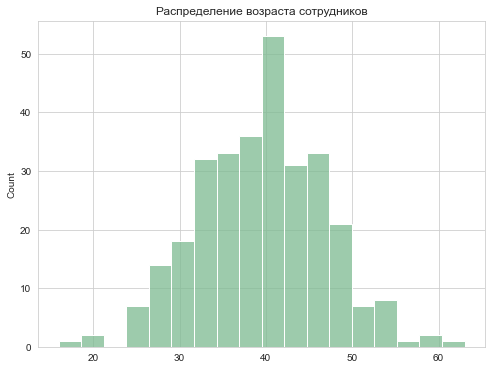

In [18]:
np.random.seed(17)

#jrheukztv возраст до нижнего значения с помощью np.floor()
age = np.floor(np.random.normal(loc=40, scale=7, size=300)).astype('int')


sns.histplot(age)
plt.title('Распределение возраста сотрудников')
plt.show()

# Пол

Создадим список из нулей и единиц, а затем присвоим значения `male` и `female`.

In [19]:
np.random.seed(17)
gender_flag = [np.random.randint(2) for _ in range(300)]

gender = ['female' if _ == 1 else 'male' for _ in gender_flag]
gender[:3]

['female', 'female', 'female']

# Имена 

Для создания имен используем библиотеку `Faker`. С ее помощью можно генерировать имена, города, даты рождения, местоположение и т.д. [Документация здесь](https://faker.readthedocs.io/en/stable/index.html)

In [20]:
from faker import Faker
fake = Faker()


`Faker` тоже умеет фиксировать `seed`, чтобы выдавать один и тот же результат при перезапуске кода. Так и сделаем.

In [21]:
Faker.seed(17)
names = [fake.name() for _ in range(300)]
names[:3]

['Renee Horne', 'Ralph Padilla', 'Ashley Johnson']

Проблема в том, что имена могут не соответствовать полу. Чтобы пофиксить это, используем другой метод из библиотеки `Faker`:

In [22]:
fake.first_name_male(), fake.first_name_female()

('Michael', 'Vickie')

Теперь нужно связать генерацию имени со значениями из списка `gender`

In [23]:
Faker.seed(17)
first_name = [fake.first_name_female() if gender[i] == 'female' else fake.first_name_male() for i in range(300)]
first_name[:3]

['Kelly', 'Renee', 'Toni']

In [24]:
Faker.seed(17)
last_name = [fake.last_name() for _ in range(300)]
names = [first_name[i] + ' ' + last_name[i] for i in range(300)]
names[:3]

['Kelly Boyd', 'Renee Roman', 'Toni Horne']

При желании можно генерировать данные на русском языке, для этого нужно указать `fake = Faker('ru_RU')`.

In [25]:
fake = Faker('ru_RU')
[fake.name() for _ in range(3)]

['Титова Жанна Оскаровна',
 'Елизавета Ниловна Мельникова',
 'Изяслав Зиновьевич Селиверстов']

# Семейное положение

Сделаем столбец-«флаг», где единице будет соответствовать «женат/замужем». Используем для этого `random.randint()`. Метод возвращает случайное целое число из диапазона от нижней границы до верхней, не включая верхнюю. Так как нам нужны только нули и единицы, указываем число 2 в качестве верхней границы диапазона и задаем `size=300`:

In [26]:
np.random.seed(17)
is_married = np.random.randint(2, size=300)

# найдем долю женатых/замужних сотрудников
np.mean(is_married)

0.5266666666666666

# Стаж

Для вычисления стажа в компании  нам нужно посчитать интервал от начала работы до текущей даты. Снова используем класс `timedelta` из бибилотеки `datetime`. Также нам понадобится класс `date`

In [27]:
from datetime import date

Для того, чтобы получить текущую дату, используем `date.today()`. При вычитании одной даты из другой создается объект `timedelta`, из которого мы извлечем количество дней. Используем list comprehension, чтобы создать список. 

In [28]:
working_period = [(date.today() -  _).days for _ in dt]
working_period[:3]

[524, 906, 1004]

# Оценка по итогам ревью

Предположим, что по итогам ревью никто не получил оценки ниже 3 при максимальной оценке 5. Используем снова  `np.random.randint`:

In [30]:
np.random.seed(17)
review_score = np.random.randint(low=3, high=6, size=300)

# средняя оценка на ревью:
np.mean(review_score)

4.046666666666667

# Грейд 

Добавим еще один столбец - грейд сотрудников. Раз мы уже сгенерировали зарплаты, то на их основе присвоим сотрудникам грейды. Для деления на группы используем перцентили и `np.select()` для присвоения значений:

In [32]:
grade = np.select(
    [
        salary < np.percentile(salary, 45),
        salary < np.percentile(salary, 84),
        salary < np.percentile(salary, 95),
        salary < np.percentile(salary, 99),
        salary >= np.percentile(salary, 99)
    ],
    [
        'junior', 
        'middle', 
        'senior',
        'lead', 
        'superboss'
        ]
)

grade[:3]

array(['junior', 'middle', 'junior'], dtype='<U11')

Посмотрим, как в итоге сотрудники распределились по грейдам:

In [35]:
pd.Series(grade).value_counts()

junior       135
middle       117
senior        33
lead          12
superboss      3
dtype: int64

Похоже на правду?

# Бонус

С помощью `np.select()` построим бонусную систему для отличников по итогам ревью:

In [36]:
bonus = np.round(np.select(
    [
        (review_score == 5) & (grade == 'junior'),
        (review_score == 5) & (grade == 'middle'),
        (review_score == 3) & (grade == 'senior'),
        (review_score == 5) & (grade == 'lead'),
        (review_score == 4) & (grade == 'superboss')
    ],
    [
        salary * 0.6,
        salary * 0.7,
        salary * 0.8,
        salary * 0.9,
        salary * 1.1
    ]

)
).astype('int')

bonus[:3]

array([   0, 2109, 1155])

# Собираем датасет

Объединяем все столбцы в таблицу:

In [37]:
df = pd.DataFrame(
    {
    'employee_id' : employee_id,
    'name' : names,
    'gender' : gender,
    'age' : age,
    'is_married' : is_married,
    'start_date' : dt,
    'working_period_days' : working_period,
    'department' : deps,
    'grade' : grade,
    'salary' : salary,
    'review_score' : review_score,
    'bonus' : bonus
    }
    )
df

,employee_id,name,gender,age,is_married,start_date,working_period_days,department,grade,salary,review_score,bonus
0,VTK-2547345952,Kelly Boyd,female,41,1,2021-02-11,524,engineering,junior,2198,4,0
1,DWT-2446700847,Renee Roman,female,27,1,2020-01-26,906,pr,middle,3013,5,2109
2,YYB-0876366514,Toni Horne,female,44,1,2019-10-20,1004,tech,junior,1925,5,1155
3,GOJ-6600822948,Dylan Roberts,male,48,0,2020-06-23,757,growth,junior,1641,4,0
4,GCK-1049872521,Ralph Miranda,male,47,0,2020-07-09,741,pr,middle,4593,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
295,WHS-3960929087,Nathan Griffith,male,49,0,2020-07-27,723,ui_ux,middle,3971,5,2780
296,BYJ-6694110718,Rachael Casey,female,39,1,2019-09-26,1028,pr,junior,1628,5,977
297,NTZ-0311134733,Teresa Ayers,female,34,1,2021-03-12,495,tech,lead,8962,3,0
298,FQE-1748457251,John Washington,male,20,0,2019-08-15,1070,management,junior,2218,5,1331


Готово!

При желании можно продолжать экспериментировать с генерацией данных и улучшать таблицу. Например, реализовать логику бонусной системы, которая будет учитывать не только грейд, но и стаж. А можно вообще сделать 3-5 таблиц с данными о сотрудниках, например, город проживания, дату рождения, информацию о промуошенах и достижениях и т.д. - и собрать небольшую базу данных. На этой базе можно практиковать SQL-запросы с джойнами и оконными функциями. 